In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import cv2
import random
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set paths
image_path = r"E:\IRP_dataset_new\APTOS_combined_images"
labels_path = r"E:\IRP_dataset_new\APTOS_labels_combined.csv"

In [5]:
# 1. Load and inspect the data
df = pd.read_csv(labels_path)
# Display basic information
print("\n--- Dataset Overview ---")
print(f"Total number of records: {len(df)}")
print("\nFirst 5 records:")
print(df.head())


--- Dataset Overview ---
Total number of records: 10832

First 5 records:
        id_code  diagnosis
0  000c1434d8d7          1
1  001639a390f0          1
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [6]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10832 entries, 0 to 10831
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    10832 non-null  object
 1   diagnosis  10832 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 169.4+ KB
None


In [7]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
          diagnosis
count  10832.000000
mean       0.502123
std        0.500019
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


In [8]:
# 2. Check for missing values
print("\n--- Missing Values Check ---")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print(f"\nTotal missing values: {missing_values.sum()}")
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the CSV file.")


--- Missing Values Check ---
id_code      0
diagnosis    0
dtype: int64
No missing values found in the CSV file.


In [9]:
# 3. Check for duplicate records
print("\n--- Duplicate Records Check ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

if duplicates > 0:
    print("\nDuplicate records:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))


--- Duplicate Records Check ---
Number of duplicate records: 0



--- Class Distribution ---
diagnosis
0    5393
1    5439
Name: count, dtype: int64


Text(0, 0.5, 'Count')

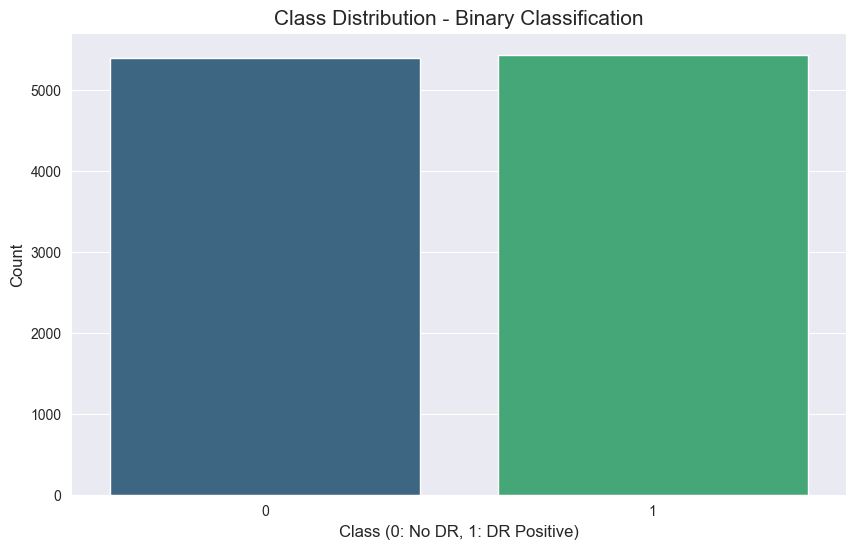

In [10]:
# 4. Class distribution
print("\n--- Class Distribution ---")
class_counts = df['diagnosis'].value_counts().sort_index()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Class Distribution - Binary Classification', fontsize=15)
plt.xlabel('Class (0: No DR, 1: DR Positive)', fontsize=12)
plt.ylabel('Count', fontsize=12)